<a href="https://colab.research.google.com/github/parkmina365/OpenCV/blob/main/OpenCV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

## 1장. OpenCV 소개 및 기본 사용법
- OpenCV: 영상 처리와 컴퓨터 비전을 위한 라이브러리. C, C++, Python 에서 사용가능

### 기본적인 함수
- cv2.imread(file_name, flag): 이미지를 읽어 Numpy 객체로 만드는 함수
  - flags:
    - IMREAD_COLOR: 이미지를 color로 읽고 투명한 부분은 무시
    - IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
    - IMREAD_UNCHANGED: 이미지를 color로 읽고 투명한 부분도 읽기(Alpha)
  - 반환값: Numpy 객체(행, 열, 색상: 기본 BGR)
- cv2.cvtColor(image, flag): 이미지를 색상 형태를 변경하는 함수
  - CoLab은 Jupyter Notebook을 기반으로 동작하므로 Matplotlib를 이용하여 이미지를 출력
  - OpenCV: BGR, Matplotlib: RGB 기준    
  - flags:
    - COLOR_BGR2RGB: BGR을 RGB로 바꾸기
    - COLOR_BGR2GRAY: BGR을 GRAY로 바꾸기

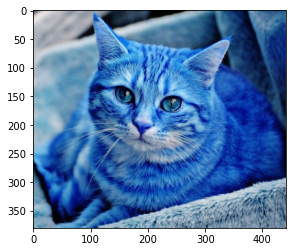

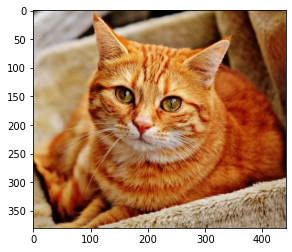

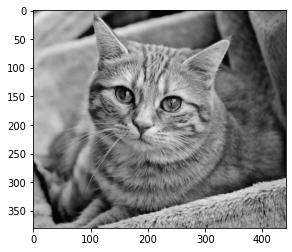

In [ ]:
import cv2
import matplotlib.pyplot as plt

# OpenCV: [R,G,B]
img_basic = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(img_basic)
plt.show()

# matplotlib: [B,G,R]
img_basic = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

## 2장. 이미지 연산

### 이미지 크기 및 픽셀 확인

In [ ]:
import cv2

image = cv2.imread('cat.jpg')

# 픽셀 수, 이미지 크기 확인
display(image.shape, image.size)

# 이미지 Numpy 객체의 특정 픽셀 선택
px = image[100, 100]
display(px, px[2]) # [B,R,G] 중 G값

(380, 441, 3)

502740

array([111, 151, 179], dtype=uint8)

179

### 특정 범위 픽셀 변경



--- 0.015337705612182617 seconds ---


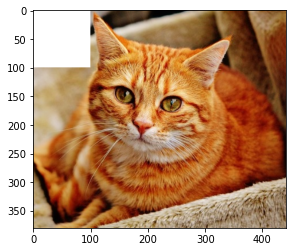

--- 0.000270843505859375 seconds ---


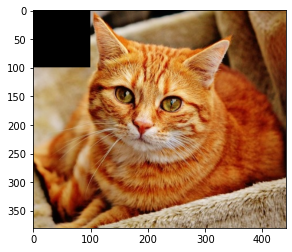

In [ ]:
import matplotlib.pyplot as plt
import time

# 1. 픽셀 하나씩 새로운 색을 채워 넣기
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]  # 흰색(BRG는 값이 클수록 색채가 약해짐)
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


# 2. 픽셀의 범위를 지정하여 새로운 색을 채워 넣기
start_time = time.time()
image[0:100, 0:100] = [0, 0, 0]  # 검정색
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### ROI 추출 및 복사
- ROI: Region of Interest

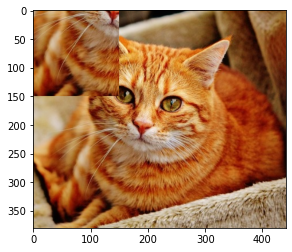

In [ ]:
# Numpy Slicing: ROI 처리 가능
roi = image[200:350, 50:200]

# ROI 단위로 이미지 붙여넣기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 픽셀별 색상 다루기

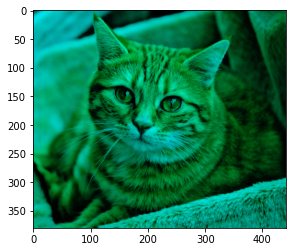

In [ ]:
image = cv2.imread('cat.jpg')
image[:,:,2] = 0 # [B,G,R] 중 R의 값을 최소로
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 3장. 도형 그리기

### 직선 그리기
- cv2.line(image, start, end, color, thickness): 이미지 안에 하나의 직선을 그리는 함수
  - start: 시작 좌표 (2차원)
  - end: 종료 좌표 (2차원)
  - thickness: 선의 두께



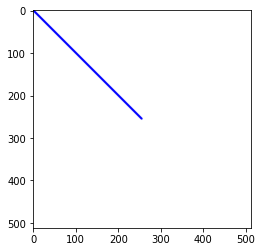

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512,512,3), 255, np.uint8)  # numpy를 255로 다 채우며, 최대 2^8(=255, 8비트)의 값을 가지게 함 
image = cv2.line(image, (0,0),(255,255),(255,0,0),3)  # color = (B,G,R)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 사각형 그리기
- cv2.rectangle(image, start, end, color, thickness): 하나의 사각형을 그리는 함수
  - start: 시작 좌표 (2차원)
  - end: 종료 좌표 (2차원)
  - thickness: 선의 두께 (채우기: -1)


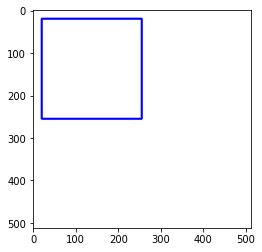

In [ ]:
image = np.full((512,512,3), 255, np.uint8) 
image = cv2.rectangle(image, (20,20), (255,255), (255,0,0), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 원 그리기
- cv2.circle(image, center, radian, color, thickness): 하나의 원을 그리는 함수
  - center: 원의 중심 (2차원)
  - radian: 반지름
  - thickness: 선의 두께 (채우기: -1)

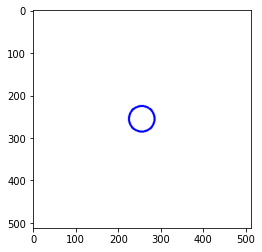

In [ ]:
image = np.full((512,512,3), 255, np.uint8)
image = cv2.circle(image, (255,255), 30, (255,0,0), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 다각형 그리기
- cv2.polylines(image, points, is_closed, color, thickness): 하나의 다각형을 그리는 함수
  - points: 꼭지점들
  - is_closed: 닫힌 도형 여부
  - thickness: 선의 두께 (채우기: -1)


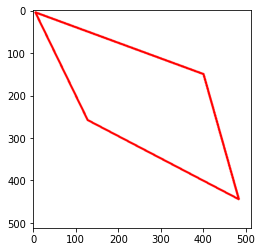

In [ ]:
image = np.full((512,512,3),255, np.uint8)
points = np.array([[5,5],[128,258],[483,444],[400,150]])
image = cv2.polylines(image, [points], True, (0,0,255),4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 텍스트 그리기
- cv2.putText(image, text, position, font_type, font_scale, color): 하나의 텍스트를 그리는 함수
  - position: 텍스트가 출력될 위치
  - font_type: 글씨체
  - font_scale: 글씨 크기 가중치



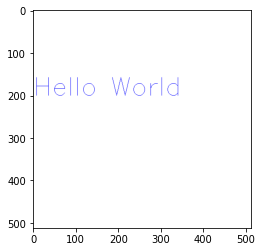

In [ ]:
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0,200), cv2.FONT_ITALIC, 2, (255,0,0))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 4장. 이미지 변형

### 이미지 크기 조절
- cv2.resize(image, dsize, fx, fy, interpolation):
  - dsize: Manual Size
  - fx: 가로 비율
  - fy: 세로 비율
  - interpolation: 보간법. 이미지의 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법
    - INTER_CUBIC: 사이즈를 크게 할 때
    - INTER_AREA: 사이즈를 작게 할 때

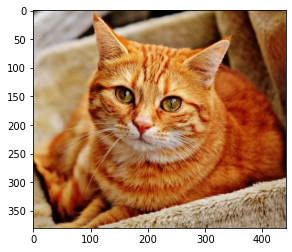

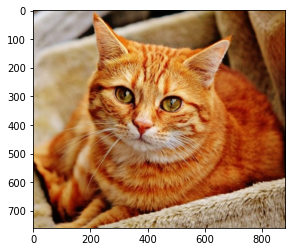

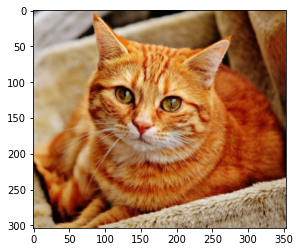

In [ ]:
# 이미지 확대, 축소: cv2.resize

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 확대
expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 축소
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

### 어핀 변환(Affine Transform)
- 이미지를 2차원으로 뒤트는 변환
- 변환 행렬의 설정에 따라 위치뿐만 아니라 방향 등도 변환 가능
- cv2.warpAffine(image, M, dsize):
  - M: 변환 행렬([[x1, y1, a], [x2, y2, b]], 일종의 선형변환의 형태)
  - dsize: Manual Size

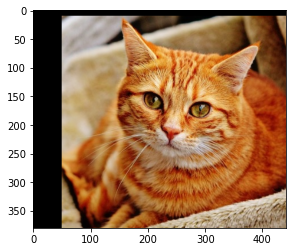

In [ ]:
# 어핀 변환으로 위치 바꾸기(평행이동)
image = cv2.imread('cat.jpg')

M = np.float32([[1, 0, 50], [0, 1, 10]])  # x축: 50 평행 이동, y축 10 평행 이동
height, width = image.shape[:2] # 행과 열 정보 저장
dst = cv2.warpAffine(image, M, (width, height))
dst = cv2.warpAffine(image, M, image.shape[:2][::-1])

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 변환 행렬: 뒤틀기
- cv2.getAffineTransform(pts1, pts2): 2 x 3의 변환 행렬을 반환
  - pts1: 변환 전 영상의 좌표 3개, 3 x 2 배열
  - pts2: 변환 후 영상의 좌표 3개, 3 x 2 배열
- pts1이 pts2로 위치가 변한 만큼 이미지를 뒤트는 기능을 제공
- 출처: https://bkshin.tistory.com/entry/OpenCV-14-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%92%A4%ED%8B%80%EA%B8%B0%EC%96%B4%ED%95%80-%EB%B3%80%ED%99%98-%EC%9B%90%EA%B7%BC-%EB%B3%80%ED%99%98, https://github.com/BaekKyunShin/OpenCV_Project_Python/tree/master/05.geometric_transform


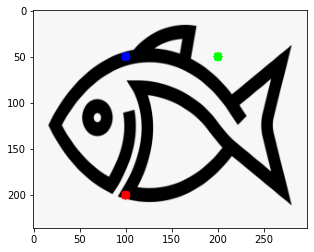

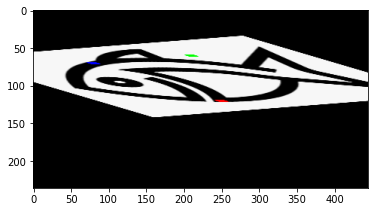

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('fish.png')
img = cv2.resize(img, None, fx=0.33, fy=0.4, interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)

#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 변환 행렬: 회전
- cv2.getRotationMatrix2D(center, angle, scale): 회전을 위한 변환 행렬 생성
  - center: 회전 중심
  - angle: 회전 각도
  - scale: Scale Factor


[[ 3.061617e-17  5.000000e-01  1.255000e+02]
 [-5.000000e-01  3.061617e-17  3.002500e+02]]


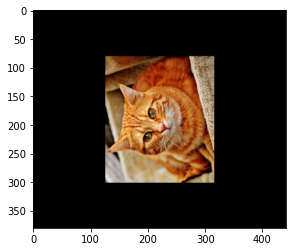

In [ ]:
image = cv2.imread('cat.jpg')

height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(M)
dst = cv2.warpAffine(image, M, image.shape[:2][::-1])

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 원근 변환(Perspective Transform)
-  이미지를 3차원으로 변환
- 멀리 있는 것은 작게 보이고, 가까이 있는 것은 크게 보이는 원근법의 원리를 적용하여 변환
- cv2.warpPerspective(image, M, dsize):
  - M: 변환 행렬(3 x 3)
  - dsize: Manual Size

- cv2.getPerspectiveTransform(pts1, pts2): 3 x 3 의 변환행렬 반환
  - pts1: 변환 이전 영상의 좌표 4개, 4 x 2 배열
  - pts2: 변환 이후 영상의 좌표 4개, 4 x 2 배열

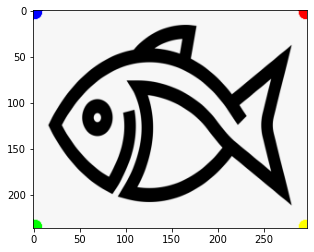

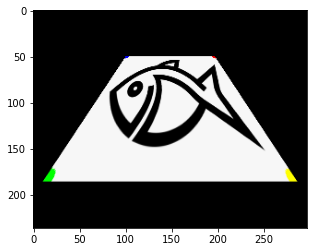

In [31]:
# 원근 변환 (perspective.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('fish.png')
img = cv2.resize(img, None, fx=0.33, fy=0.4, interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 5장. 이미지 합치기


- cv2.add(): Saturation 연산. aka clip 연산
  - 0보다 작으면 0, 255보다 크면 255로 표현
- np.add(): Modulo 연산. 256으로 나눈 나머지를 의미. 이미지가 왜곡되어 잘 안씀
  - 256은 0, 257은 1로 표현

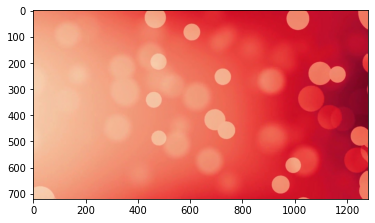

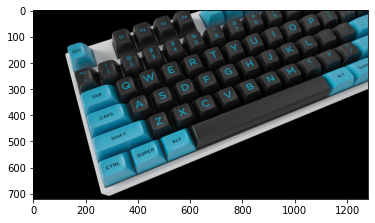

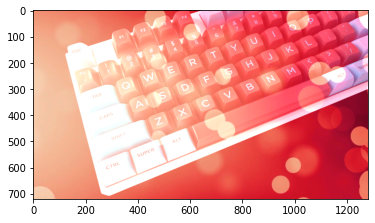

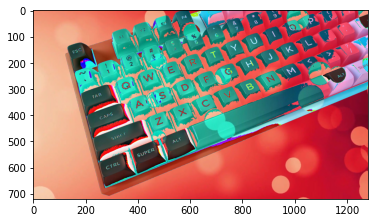

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread('image_1.jpg')
image_2 = cv2.imread('image_2.png')

plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()

sat = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(sat, cv2.COLOR_BGR2RGB))
plt.show()

modulo = image_1 + image_2
plt.imshow(cv2.cvtColor(modulo, cv2.COLOR_BGR2RGB))
plt.show()